In [ ]:
%matplotlib inline

In [ ]:
install_libs = False
if install_libs:
    !pip install --user 'pandas==1.1'
    !pip install --user 'pykrige>=1.5.1'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import PseudoNetCDF as pnc
import pycno

In [ ]:
plt.rc('figure', facecolor='white')

In [ ]:
for validate in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]:
    %run scripts/cmaq_uk.py --validate={validate}
    %run scripts/blend.py --validate={validate} 20160715
    if validate > 0:
        %run scripts/validate {validate} FUSED.URBRUR


In [ ]:
%run scripts/make_maps.py 20160715

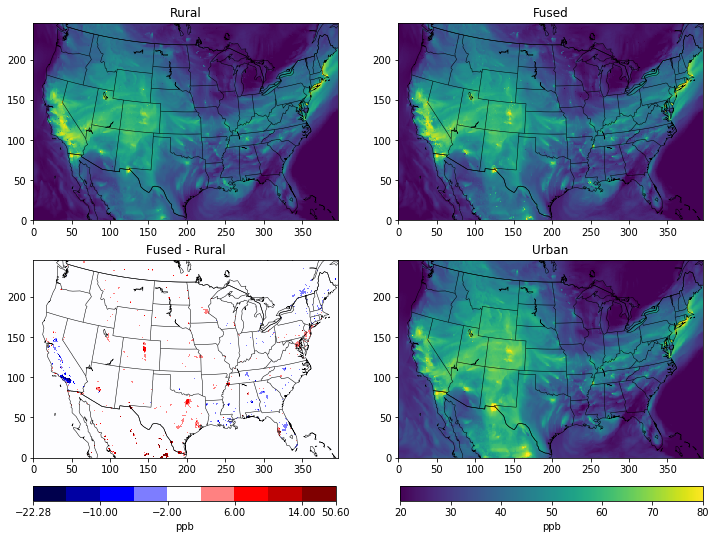

In [5]:
urbf = pnc.pncopen('output/UK.20160715.FUSED.URB.nc', format='ioapi')
rurf = pnc.pncopen('output/UK.20160715.FUSED.RUR.nc', format='ioapi')
bothf = pnc.pncopen('output/UK.20160715.FUSED.URBRUR.nc', format='ioapi')

fig, axx = plt.subplots(2, 2, figsize=(12, 8))
dax = fig.add_axes([.125, .05, .35, .025])
cax = fig.add_axes([.55, .05, .35, .025])
cno = pycno.cno(proj=urbf.getproj(withgrid=True))
norm = plt.Normalize(vmin=20, vmax=80)
axx[0, 0].pcolormesh(rurf.variables['UK_TOTAL'][0, 0], norm=norm)
axx[0, 0].set_title('Rural')
p = axx[0, 1].pcolormesh(bothf.variables['UK_TOTAL'][0, 0], norm=norm)
axx[0, 1].set_title('Fused')
axx[1, 1].pcolormesh(urbf.variables['UK_TOTAL'][0, 0], norm=norm)
axx[1, 1].set_title('Urban')
fig.colorbar(p, label='ppb', orientation='horizontal', cax=cax);
diffval = bothf.variables['UK_TOTAL'][0, 0] - rurf.variables['UK_TOTAL'][0, 0]
dedges = np.append(np.append(diffval.min(), np.linspace(-14, 14, 8)), diffval.max())
dnorm = plt.matplotlib.colors.BoundaryNorm(dedges, 256)
p = axx[1, 0].pcolormesh(diffval, norm=dnorm, cmap='seismic')
axx[1, 0].set_title('Fused - Rural')
dticks =np.append(dedges[::2], dedges[-1])
fig.colorbar(p, ticks=dticks, label='ppb', orientation='horizontal', cax=dax);

for ax in axx.ravel():
    cno.draw('MWDB_Coasts_USA_3.cnob', ax=ax)
